# Simple Example of Using _FinClust_

## Intro

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..')))

## Get Data

In [3]:
symbols = ['AAPL', 'MSFT', 'GE', 'CSCO', 'INTC', 'T', 'AMZN', 'DIS', 'PFE', 'BAC', 'JNJ', 'XOM', 'GOOG', 'WMT', 'VZ', 'F', 'C', 'KO', 'TSLA', 'META', 'PG', 'HD', 'IBM', 'MCD', 'JPM', 'NVDA', 'ORCL', 'MRK', 'MO', 'BA', 'CVX', 'AMD', 'SBUX', 'NFLX', 'PEP', 'WFC', 'QCOM', 'DELL', 'CAT', 'V', 'NOK', 'GM', 'BABA', 'NKE', 'BRK-B', 'SIRI', 'COST', 'GOOGL', 'MMM', 'BP']
len(symbols)

50

In [4]:
import yfinance as yf

data = yf.download(
    tickers=symbols,
    start="2012-01-01",
    end="2022-01-01",
    interval="1d",
)
data.dropna(axis=1, how="all", inplace=True) 

[*********************100%***********************]  50 of 50 completed


In this example, we will use only price data (represented by the daily close price).

In [5]:
data = data["Adj Close"]
data.shape

(2517, 50)

## Example of Run

In this case we will use the _AgglomerativeClustering_ method, which will be evaluated on a time series of a quarter of a year (`window = timedelta(weeks=16)`).
The clustering will be evaluated every month (`step = timedelta(weeks=4)`).
The correlation coefficient will be used to calculate the similarities (`similarity_func = np.corrcoef`).
We want to get 5 clusters at the output (`n_clusters=5`).
For the evaluation we will use a method from the [QuantStats](https://github.com/ranaroussi/quantstats) library (implemented with `QuantstatsEvaluator`).

In [6]:
## Import the required modules
from datetime import timedelta
import numpy as np

from finclust import PortfolioManager
from finclust.clustering import ScikitClusterer
from finclust.evaluation import QuantstatsEvaluator

from sklearn.cluster import AgglomerativeClustering

## Create instance of PortfolioManager
mgr = PortfolioManager(
    window = timedelta(weeks=16),
    step = timedelta(weeks=4),
    similarity_func = np.corrcoef,
    clusterer = ScikitClusterer(
        cluster_method = AgglomerativeClustering(affinity="precomputed", linkage="single", n_clusters=5),
    ),
    evaluator = QuantstatsEvaluator(),
)
## Run the process
mgr.run(data=data)

/Users/jakub/Documents/SDIPR/finclust/finclust/advisor.py:89: UserWarning: Parameter `evaluate_baseline` is True; however, `baseline_prices` is not provided.
  warnings.warn("Parameter `evaluate_baseline` is True; however, `baseline_prices` is not provided.")


18:49:50.632 Calculating returns
18:49:50.634 Calculating similarities
18:49:50.673 Calculating clusters
18:49:50.772 Calculating returns of portfolios
18:49:54.295 Evaluating cluster portfolios
18:49:55.618 Run completed.
____________________________________
Duration of the run: 0:00:04.986549.



,AgglomerativeClustering-0,AgglomerativeClustering-1,AgglomerativeClustering-2,AgglomerativeClustering-3,AgglomerativeClustering-4
Start Period,2012-04-23,2012-04-23,2012-04-23,2012-04-23,2012-04-23
End Period,2021-12-31,2021-12-31,2021-12-31,2021-12-31,2021-12-31
Risk-Free Rate,0,0,0,0,0
Time in Market,1.0,0.95,0.7,0.72,0.92
Cumulative Return,5.2,1.64,0.35,3.81,0.09
CAGR﹪,0.21,0.11,0.03,0.18,0.01
Sharpe,1.19,0.5,0.25,0.81,0.19
Prob. Sharpe Ratio,1.0,0.94,0.78,0.99,0.72
Sortino,1.68,0.73,0.36,1.21,0.27
Sortino/√2,1.19,0.51,0.25,0.85,0.19


We can see that one strategy achieved a cumulative **gain of 520%** over the period (with a maximum **drawdown of 34%**).

## Visualizations

The following are examples of two visualizers.

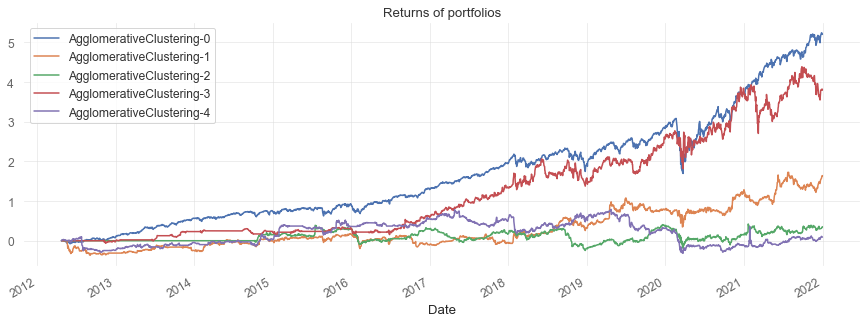

In [7]:
import matplotlib.pyplot as plt
from finclust.visualization import CumulativeReturnsVisualizator

visualizator = CumulativeReturnsVisualizator(
    include_baseline=False,
    # plotting_backend="plotly",
    figsize=(15, 5),
)

visualizator.visualize(mgr)
plt.show()

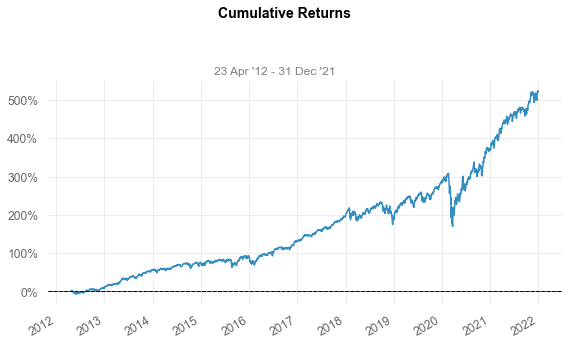

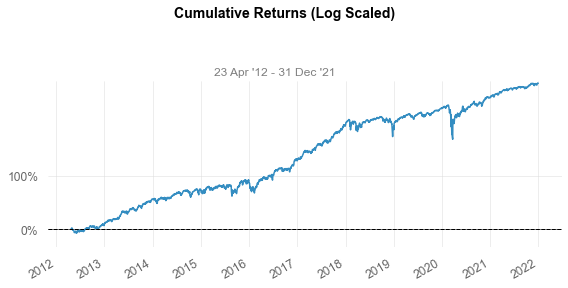

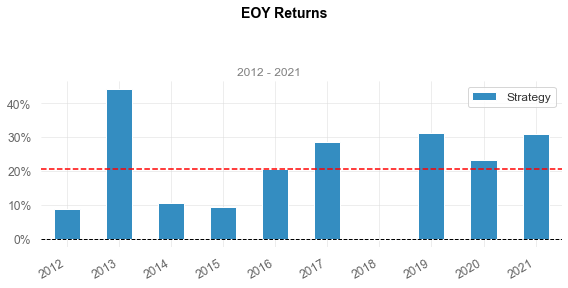

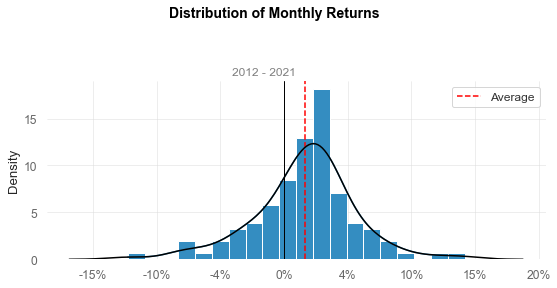

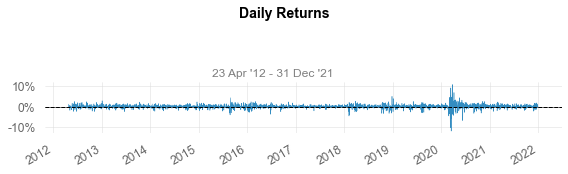

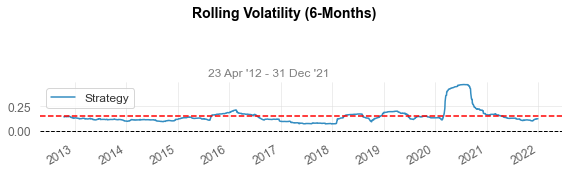

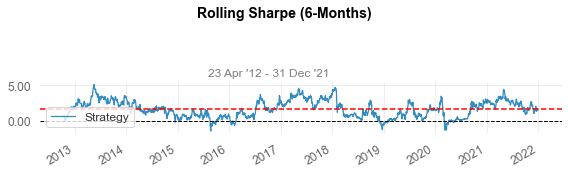

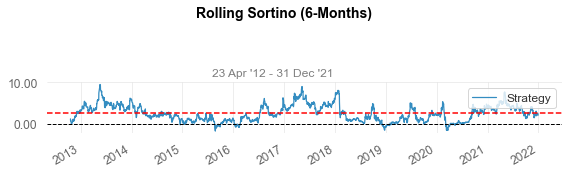

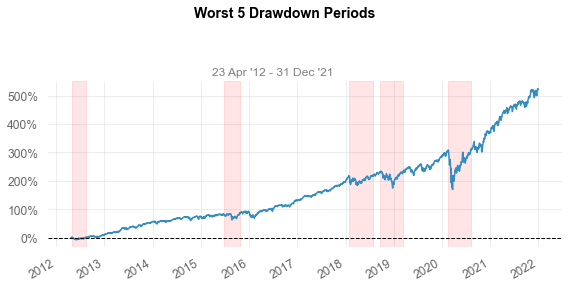

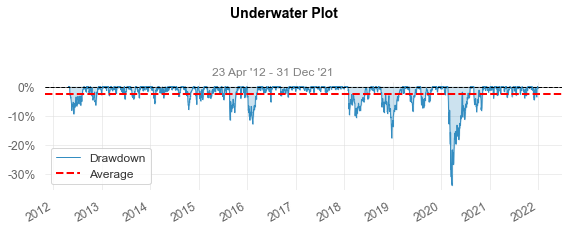

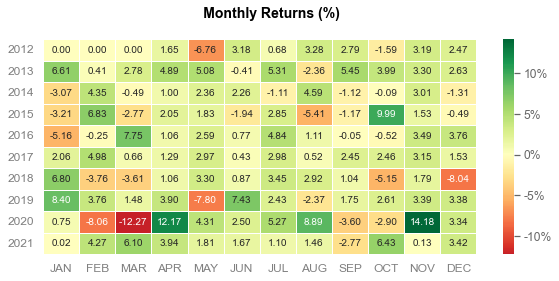

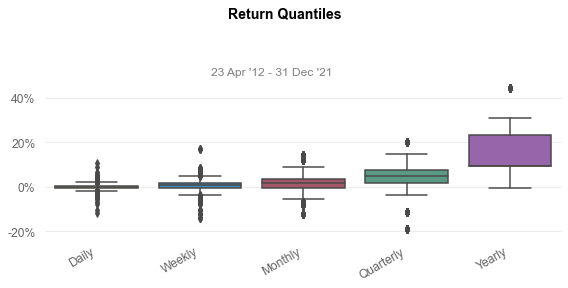

In [8]:
from finclust.visualization import QuantstatsVisualizator

visualizator = QuantstatsVisualizator(
    strategy_name="AgglomerativeClustering-0",
    mode="full",
)

visualizator.visualize(mgr)